# Exemple d'ANOVA: Mesure de polluants en Occitanie

> __Auteurs__:  Arielle Gantelet, Vitus Kirchberger et Samuel Valiquette

In [1]:
import os
import sys
sys.path.append("./codes")

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 25})  # 
%matplotlib notebook

In [2]:
import seaborn as sns
import pandas as pd
from pathlib import Path
from statsmodels.formula.api import ols
import statsmodels.api as sm

directory = Path.cwd() 
directory = directory.joinpath('prebuiltimages')
def my_saving_display(fig, directory, image_name, imageformat="pdf",
                      saving=False):
    """"Saving with personal function."""
    if saving is True:
        fig.savefig(directory.joinpath(image_name + '.' + imageformat),
                    format=imageformat)

## Importation et traitement des données journalières

In [3]:
from download import download
url = "http://josephsalmon.eu/enseignement/datasets/Mesure_journaliere_Region_Occitanie_Polluants_Principaux.csv"
path_target = "datasets/Mesure_journaliere_Region_Occitanie_Polluants_Principaux.csv"
download(url, path_target, replace=True)

file_sizes: 100%|██████████████████████████| 5.59M/5.59M [00:03<00:00, 1.75MB/s]


Successfully downloaded file to datasets/Mesure_journaliere_Region_Occitanie_Polluants_Principaux.csv


'datasets/Mesure_journaliere_Region_Occitanie_Polluants_Principaux.csv'

In [4]:
occ = pd.read_csv(path_target)

#### Dans notre objet *occ*, on obtient l'année et le mois grâce à la date de début de chaque mesure.

In [5]:
occ['date'] = pd.to_datetime(occ['date_debut']).dt.to_period('M')

C:\Users\ariel\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


#### Regardons les villes disponibles dans le data pour faire notre choix.

In [6]:
occ.nom_com.unique()

array(['TOULOUSE', 'GAUDONVILLE', 'BESSIERES', 'TARBES',
       'SAINT-LAURENT-DES-ARBRES', 'NIMES', 'LA CALMETTE', 'PERPIGNAN',
       'MONTPELLIER', 'MILLAU', 'CASTRES', 'SAINT-GELY-DU-FESC',
       'LUNEL-VIEL', 'LOURDES', 'BLAGNAC', 'LATTES', 'AGDE',
       'SAINT-ESTEVE', 'ALBI', 'MIRAMONT-DE-COMMINGES', 'PAMIERS',
       'PEYRUSSE-VIEILLE', 'MONTGISCARD', 'BELESTA-EN-LAURAGAIS',
       'SAINT-GAUDENS', 'CORNEILHAN', 'FRAISSE-SUR-AGOUT', 'SAZE',
       'RODEZ', 'CAHORS', 'SAINT-PRIVAT-DES-VIEUX'], dtype=object)

#### Pour le reste de notre analyse, nous allons comparer la mesure d'O3 à Montpellier et Nîmes. Ces données sont enregistrées dans l'objet *df*.

In [7]:
ville = 'MONTPELLIER', 'NIMES'

df =occ[occ['nom_com'].isin(ville)]
df =df[df['polluant']=='O3']

#### Nos mesures ont été prises entre Octobre 2017 et Octobre 2018. Nous avons sélectionné le mois de juillet 2018 ('2018-07') pour notre analyse et on vérifie que pour chaque ville on ait le même nombre de donnée et le même nombre de station. Grâce au code ci-dessous, on conclut qu'on a bien 31 observations pour chaque ville.

In [8]:
df.date.unique()

<PeriodArray>
['2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04',
 '2018-05', '2018-06', '2018-07', '2018-09', '2018-08', '2018-10']
Length: 13, dtype: period[M]

In [9]:
mont = df[df['nom_com'] == 'MONTPELLIER']

In [10]:
mont = mont[mont.date == '2018-07']

In [11]:
mont.code_station.unique()

array(['FR08016'], dtype=object)

In [12]:
mont.count()[0]

31

In [13]:
nimes = df[df['nom_com'] == 'NIMES']

In [14]:
nimes = nimes[nimes.date == '2018-07']

In [15]:
nimes.code_station.unique()

array(['FR08614'], dtype=object)

In [16]:
nimes.count()[0]

31

In [17]:
df = df[df.date=='2018-07']

#### On modifie notre base de donnée pour avoir seulement le nom des villes et leurs mesures d'O3 en juillet 2018.

In [18]:
df = df[['nom_com', 'valeur_originale']]

# ANOVA pour l'O3 en juillet 2018 avec 2 villes ($\alpha=0.05$) 

In [19]:
results = ols('valeur_originale ~ nom_com', data=df).fit()

In [20]:
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
nom_com,6808.114546,1.0,33.859685,2.460162e-07
Residual,12064.107438,60.0,NaN,NaN


#### Notre test est significatif à $\alpha = 0.05$. Cela signifie que les effets individuels ne sont pas nuls. Pour conclure quelle ville est la plus polluée (basé sur l'O3), il suffit de regarder un graphique *boxplot*.

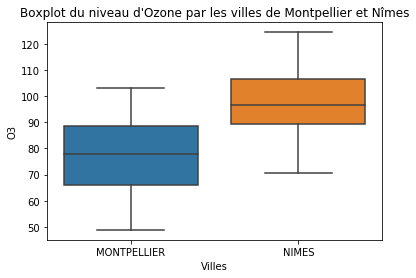

In [21]:
sns.boxplot(data=df, x='nom_com', y='valeur_originale')
plt.xlabel('Villes')
plt.ylabel('O3') 
plt.title("Boxplot du niveau d'Ozone par les villes de Montpellier et Nîmes")
plt.show()

#### D'après le graphique ci-dessus, il est raisonnable de dire qu'il est mieux de vivre à Montpellier qu'à Nîmes durant le mois de juillet. 

# ANOVA pour l'O3 en juillet 2018 avec 3 villes ($\alpha=0.05$) 

#### Cela revient à la même méthode pour avoir notre jeu de données à exploiter et pour appliquer l'anova.

In [22]:
ville = 'MONTPELLIER','TARBES','CASTRES'

df2 =occ[occ['nom_com'].isin(ville)]
df2 =df2[df2['polluant']=='O3']

In [23]:
mont2 = df2[df2['nom_com'] == 'MONTPELLIER']
mont2 = mont2[mont2.date == '2018-09']
mont2.code_station.unique()
mont2.count()[0]

30

In [24]:
tarbes = df2[df2['nom_com'] == 'TARBES']
tarbes = tarbes[tarbes.date == '2018-09']
tarbes.code_station.unique()
tarbes.count()[0]

30

In [25]:
cast= df2[df2['nom_com'] == 'CASTRES']
cast = cast[cast.date == '2018-09']
cast.code_station.unique()
cast.count()[0]

30

In [26]:
df2 = df2[df2.date=='2018-09']
df2 = df2[['nom_com', 'valeur_originale']]

In [27]:
results2 = ols('valeur_originale ~ nom_com', data=df2).fit()

In [28]:
aov_table2 = sm.stats.anova_lm(results2, typ=2)
aov_table2

,sum_sq,df,F,PR(>F)
nom_com,1379.947763,2.0,4.335629,0.016036
Residual,13845.218292,87.0,NaN,NaN


### On constate que notre test est significatif à $\alpha = 0.05$.

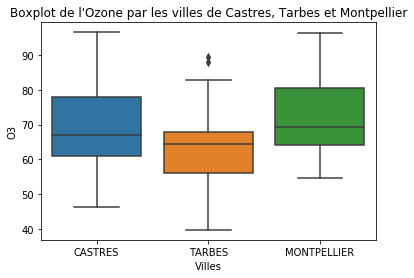

In [29]:
sns.boxplot(data=df2, x='nom_com', y='valeur_originale')
plt.xlabel('Villes')
plt.ylabel('O3') 
plt.title("Boxplot de l'Ozone par les villes de Castres, Tarbes et Montpellier")
plt.show()

#### Dans le cas présent, l'anova test si au moins un facteur d'influence est non nul. Ici, c'est donc le cas (notre p-value est inférieur à 5%), mais pour savoir lequel est-ce, il faudra alors procéder à des tests plus complets (notamment des tests multiples pour voir la significativité entre les paires).

#### Cependant, nous pourrons conclure au vu du boxplot, qu'il semble être mieux de vivre à Tarbes que dans les deux autres villes, mais comme expliqué plus haut, nous ne nous prononcerons pas quant à savoir où il est mieux de vivre entre Montpellier et Castres. 